<a href="https://colab.research.google.com/github/seunghy1468/Sparta_Coding_Machine_Learning/blob/main/1%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_02_%EC%BA%90%EA%B8%80_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle 캐글

https://kaggle.com

캐글은 머신러닝 엔지니어가 레벨업 할 수 있는 던전이자, 사냥터입니다. 수많은 공개된 데이터셋과 각 데이터셋 별로 사람들이 분석한 결과들을 모아놓은 플랫폼이죠.

기업 및 단체에서 Prize를 걸고 데이터와 해결 과제를 등록하면, 데이터 사이언티스트들이 이를 해결하기 위해 모델을 개발하고 경쟁하기도 하는 플랫폼입니다.

### Kaggle이란
데이터 사이언티스트를 위한 커뮤니티이다.
data scientist, machine learning enginner도 있고~



## Colab에서 Kaggle 데이터셋 다운로드 방법

1. [Kaggle](https://www.kaggle.com) 회원가입
2. Account(계정) 페이지 진입 (https://www.kaggle.com/[사옹자이름]/account)
3. API - Create New API Token 클릭하고 kaggle.json 다운로드
4. 브라우저에서 json 파일을 열어 username 및 key 복사
5. 아래 코드에 자신의 username 및 key를 붙여넣어 환경변수 설정 실행

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = '' # username
os.environ['KAGGLE_KEY'] = '' # key

## 광고 데이터셋 다운로드

1. Kaggle에서 원하는 데이터셋을 검색 (예: https://www.kaggle.com/ashydv/advertising-dataset)
2. [Copy API command] 버튼 클릭 (New Notebook 옆에 ... 버튼 클릭)
3. 코드 셀에 붙여넣고 실행! (맨 앞에 "!" 꼭 붙이는거 잊지 마세요!)



In [2]:
!kaggle datasets download -d ashydv/advertising-dataset

  0% 0.00/1.83k [00:00<?, ?B/s]
100% 1.83k/1.83k [00:00<00:00, 3.57MB/s]


데이터셋 압축 해제

In [3]:
!unzip /content/advertising-dataset.zip

Archive:  /content/advertising-dataset.zip
  inflating: advertising.csv         


##  광고 데이터 예측 (Single-variable linear regression)

TV 광고 금액으로 Sales 예측하기

In [4]:
# 기본적으로 계속 사용
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np

# skleaern 머신러닝을 도와주는 package
# train_test: training set // test set 분리해준다
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

### 데이터셋 로드

In [5]:
# 데이터셋이 어떻게 생겼는지 살펴봄... 습관화
df = pd.read_csv('advertising.csv')
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### 데이터셋 크기 살펴보기

In [6]:
# 200줄 4개의 column
print(df.shape)

(200, 4)


### 데이터셋 살짝 살펴보기

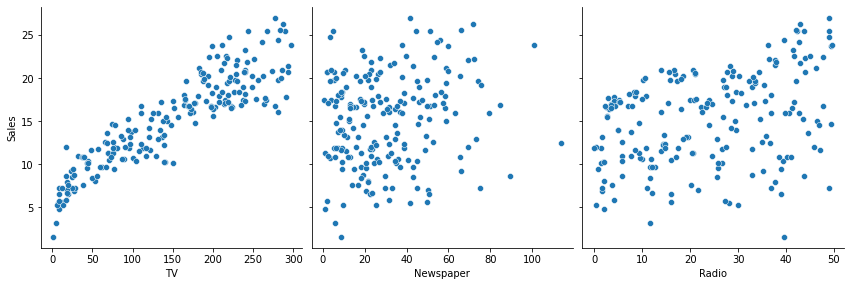

In [7]:
# df통채로 넣고 sales와 관련있는 데이터 중 보고 싶은 column 만!  
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars=['Sales'], height=4)

### 데이터셋 가공

In [8]:
# keras는 numpy array로 바꿔준 데이터만 취급하니까
# np.array로 바꿔준다
x_data = np.array(df[['TV']], dtype=np.float32)
y_data = np.array(df['Sales'], dtype=np.float32)

# y_data가 200, 로 x_data와 맞지 않는다
print(x_data.shape)
print(y_data.shape)

(200, 1)
(200,)


In [9]:
# 200, 1로 맞춘다
# 이렇게 reshape을 해야 keras가 이해하기 편하다
x_data = x_data.reshape((-1, 1))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

(200, 1)
(200, 1)


### 데이터셋 분할

학습 데이터 80%: traning set   
검증 데이터 20%: validation set   

참고) 강의에서는 편의를 위해 테스트 데이터를 나누지 않았습니다. 실무에서는 꼭 학습/검증/테시트 데이터를 나누는 것 잊지마세요!

In [10]:
# test_size=0.2: 20%, 나머진 80%로 쓴다
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

# traning data는 160개
# validation data는 40개로 한다.
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(160, 1) (40, 1)
(160, 1) (40, 1)


### 학습

In [11]:
model = Sequential([
  Dense(1)
])

# Adam: 좀 더 성능이 좋은 optimizer. 묻따ㄴㄴ
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1))

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), 
    # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증된 결과를 보여준다.
    epochs=100 # epochs 복수형으로 쓰기!
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
5/5 [==============================] - 1s 36ms/step - loss: 7857.4438 - val_loss: 1586.8904
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 528.5839 - val_loss: 745.3546
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 1383.8658 - val_loss: 1939.3704
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 1328.8693 - val_loss: 521.1108
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 178.2937 - val_loss: 62.8175
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 222.2669 - val_loss: 407.9418
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 292.0508 - val_loss: 151.8688
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 59.4009 - val_loss: 28.3424
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 56.5845 - val_loss: 91.2027
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 72.8279 - val_loss

### 검증 데이터로 예측하기

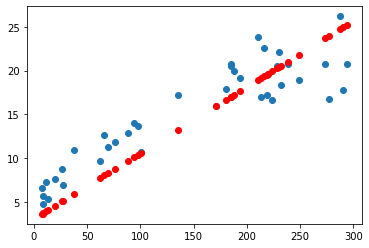

In [ ]:
y_pred = model.predict(x_val)

# scatter: 점찍기
# 예측값은 red로 그린다. 
plt.scatter(x_val, y_val)
plt.scatter(x_val, y_pred, color='r')
plt.show()

## 광고 데이터 예측하기 (Multi-variable linear regression)

TV, Newspaper, Radio 광고 금액으로 Sales 예측하기

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('advertising.csv')

# 한꺼번에 x_data에 넣어준다
x_data = np.array(df[['TV', 'Newspaper', 'Radio']], dtype=np.float32)
y_data = np.array(df['Sales'], dtype=np.float32)

# x_data만 -1,3이 됨. 비교할 데이터가 3개니깐
x_data = x_data.reshape((-1, 3))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

# train_test_split으로 training set과 validation set을 나눈다
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

model = Sequential([
  Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1))

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=100 # epochs 복수형으로 쓰기!
)

(200, 3)
(200, 1)
(160, 3) (40, 3)
(160, 1) (40, 1)
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 27ms/step - loss: 10246.8545 - val_loss: 3293.2234
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 2942.3792 - val_loss: 2736.8777
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 3253.4814 - val_loss: 1975.8590
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 1724.4613 - val_loss: 686.6664
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 655.3567 - val_loss: 699.8718
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 553.3856 - val_loss: 399.1053
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 186.3817 - val_loss: 45.5615
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 58.8303 - val_loss: 90.1175
Epoch 9/100
5/5 [==============================] - 0s 8ms/step - loss: 75.0300 - val_loss: 31.3682
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 16.0330 - val_loss: 22.9370

In [13]:
y_pred = model.predict(x_val)

print(y_pred.shape)

(40, 1)


## TV 데이터 예측 그래프

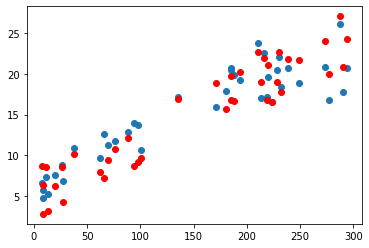

In [14]:
# x_val[:,0] x의 validation data의 첫번 째 데이터와 Sales의 그래프를 그려본다
plt.scatter(x_val[:, 0], y_val)
plt.scatter(x_val[:, 0], y_pred, color='r')
plt.show()

## Newspaper 데이터 예측 그래프

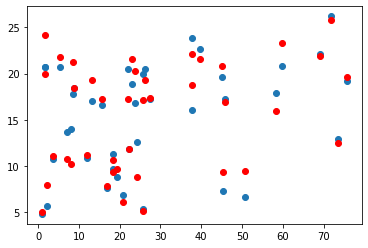

In [ ]:
plt.scatter(x_val[:, 1], y_val)
plt.scatter(x_val[:, 1], y_pred, color='r')
plt.show()

### Radio 데이터 예측 그래프

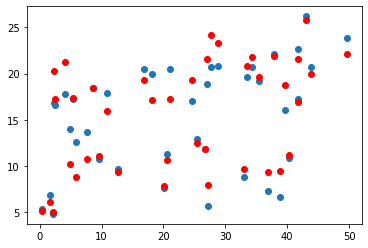

In [ ]:
plt.scatter(x_val[:, 2], y_val)
plt.scatter(x_val[:, 2], y_pred, color='r')
plt.show()